In [1]:
from fastai2.basics import *
from fastai2.callback.all import *
from fastai2.vision.all import *

# Single Lable Classification

In [5]:
pets = DataBlock(blocks=(ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(),
                 get_y=RegexLabeller(pat=r'/([^/]+)_\d+.jpg$'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=244, max_rotate=30, min_scale=0.75))

In [6]:
?ImageBlock

In [7]:
?CategoryBlock

In [8]:
dls = pets.dataloaders(untar_data(URLs.PETS)/"images", bs=32)

In [9]:
len(dls.train.items)

5912

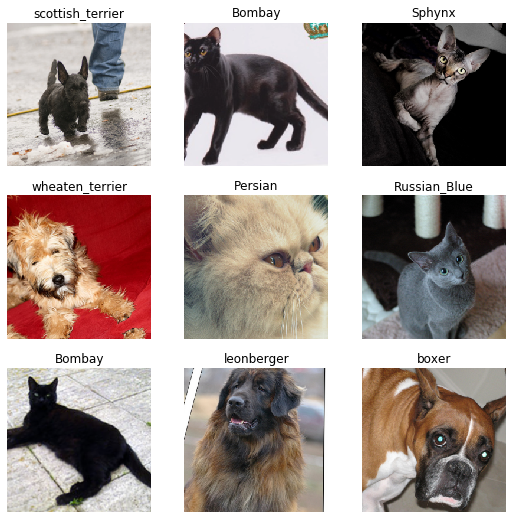

In [11]:
dls.show_batch(max_n=9)

Import models

In [12]:
from torchvision.models import resnet34, resnet50

In [13]:
opt_func = partial(Adam, lr=slice(3e-3), wd=0.01, eps=1e-8)

Create learners

In [24]:
learn = cnn_learner(dls, resnet50, opt_func=opt_func, metrics=error_rate, config=cnn_config(ps=0.33)).to_fp16()

In [25]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.519974,0.256220,0.082544,00:35


Unfreeze model and fit with discriminative learning rates

In [26]:
learn.unfreeze()

In [27]:
learn.fit_one_cycle(1, slice(1e-5, 1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.424522,0.258999,0.085927,00:43


View Results

In [38]:
fname = dls.train_ds.items[0]

learn.predict(fname)

('pug',
 tensor(29),
 tensor([1.2417e-08, 5.0430e-08, 2.4275e-08, 2.9592e-06, 3.0867e-08, 3.2911e-07,
         5.4395e-10, 1.0437e-07, 6.6397e-09, 5.8340e-08, 7.1227e-08, 8.8638e-10,
         1.0548e-08, 3.6750e-07, 1.4194e-08, 5.8939e-09, 3.4265e-05, 6.4383e-06,
         2.9025e-08, 1.0650e-09, 4.1794e-09, 6.4985e-09, 3.6326e-08, 3.0956e-05,
         1.2821e-09, 4.4577e-09, 5.1223e-07, 7.2780e-09, 2.5054e-09, 9.9988e-01,
         1.1383e-08, 3.1170e-08, 6.5132e-07, 2.6879e-09, 4.7203e-05, 1.0294e-08,
         2.3088e-07]))

In [39]:
learn.export()

In [40]:
learn1 = load_learner('export.pkl')

In [41]:
learn1.predict(fname)

('pug',
 tensor(29),
 tensor([1.2379e-08, 5.0429e-08, 2.4305e-08, 2.9575e-06, 3.0925e-08, 3.2968e-07,
         5.4333e-10, 1.0469e-07, 6.6598e-09, 5.8477e-08, 7.1343e-08, 8.8940e-10,
         1.0594e-08, 3.6895e-07, 1.4219e-08, 5.9123e-09, 3.4255e-05, 6.4538e-06,
         2.9021e-08, 1.0647e-09, 4.1916e-09, 6.4970e-09, 3.6314e-08, 3.1018e-05,
         1.2805e-09, 4.4627e-09, 5.1282e-07, 7.2892e-09, 2.5017e-09, 9.9988e-01,
         1.1407e-08, 3.1192e-08, 6.5200e-07, 2.6923e-09, 4.7340e-05, 1.0315e-08,
         2.3110e-07]))

In [42]:
img = PILImage.create(fname)

In [44]:
learn.predict(img)

('pug',
 tensor(29),
 tensor([1.2417e-08, 5.0430e-08, 2.4275e-08, 2.9592e-06, 3.0867e-08, 3.2911e-07,
         5.4395e-10, 1.0437e-07, 6.6397e-09, 5.8340e-08, 7.1227e-08, 8.8638e-10,
         1.0548e-08, 3.6750e-07, 1.4194e-08, 5.8939e-09, 3.4265e-05, 6.4383e-06,
         2.9025e-08, 1.0650e-09, 4.1794e-09, 6.4985e-09, 3.6326e-08, 3.0956e-05,
         1.2821e-09, 4.4577e-09, 5.1223e-07, 7.2780e-09, 2.5054e-09, 9.9988e-01,
         1.1383e-08, 3.1170e-08, 6.5132e-07, 2.6879e-09, 4.7203e-05, 1.0294e-08,
         2.3088e-07]))

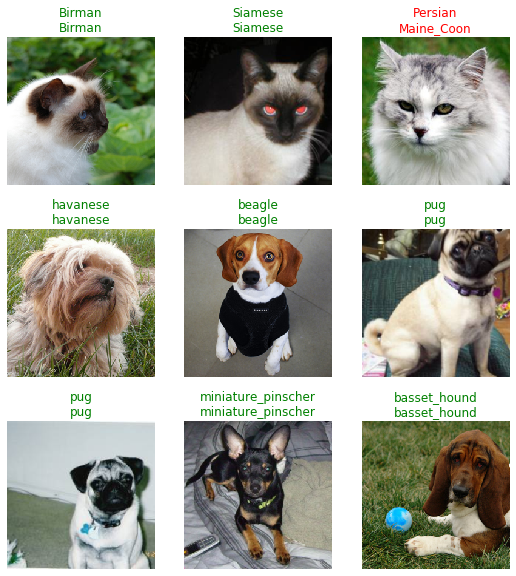

In [45]:
learn.show_results(max_n=9)

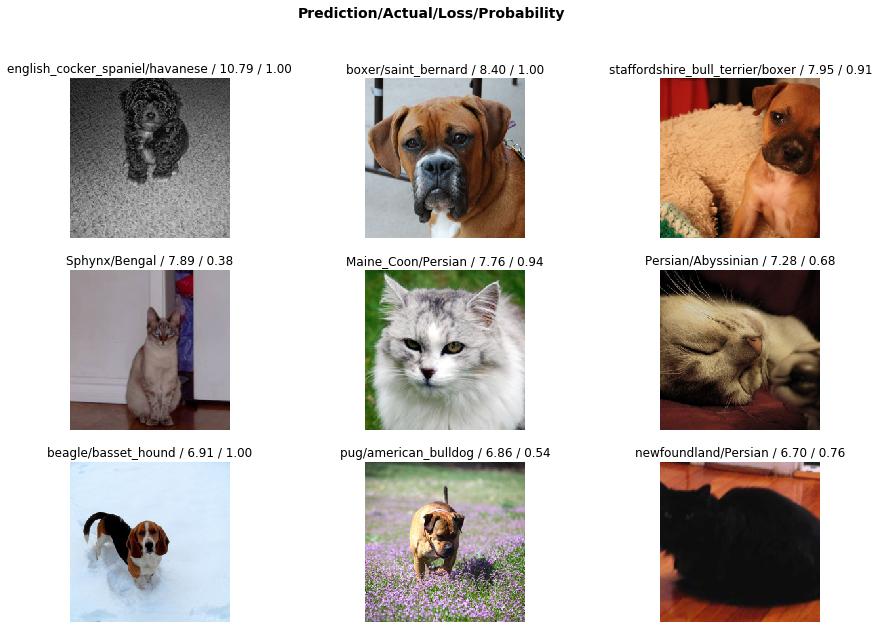

In [46]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,10))